# Numerical Linear Regression

## Steps

1. Gradient descent with one variable
2. Newton method with one variable
3. Gradient descent with two (and more) variables
4.  Newton method with two (and more) variables

## Gradient descent with one variable 

Let us start a simple linear model $Y = aX$ with one feature $X$ and one response $Y$, a slope of $a$ that is to be learned assuming an intercept $b=0$.

We generate data for $Y=2X, X\in [1,10]$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

[]

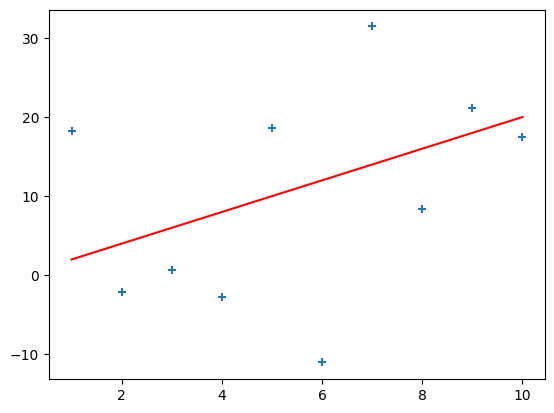

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1) # for reproducibility
N = 10
a0 = 2
X = np.array(range(1,N+1))
Y = a0*X + np.random.normal(0.0,10.0, N)

plt.scatter(X,Y, marker='+')
plt.plot(X, a0*X, c='r')
plt.plot()


We learn $\hat a$ (parameter, weight) from the data and expect it to be $\approx 2$. Therefore, we minimize the residual sum of squares as our optimization goal (loss, error) function, i.e., $\hat a = \min \arg RSS(a)$ where $RSS(a) =\sum_{i=1}^{n}(y_i - a x_i)^2$.  

For the sake of demonstrating the numerical approach, we deliberately ignore that an analytic solution exists. 

Let's define and plot $RSS$ as a function of $a$. We chose the range of $a$ around the (actually unknown) minimum of $\approx 2$. 

In [6]:
def rss(a,X,Y):
    n = len(X)
    rss = 0
    for i in range(n):
        rss += (Y[i]-a*X[i])**2
    return rss

In [7]:
def plot_rss(f,a_range):
    err_range = [f(e) for e in a_range]
    plt.plot(a_range, err_range)

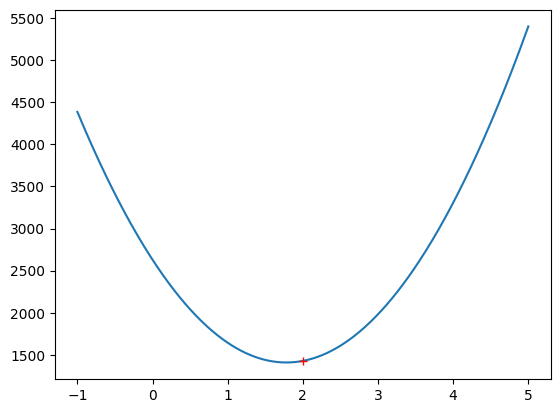

rss = 1427.6757139745007


In [8]:
f = lambda a : rss(a,X,Y)
a_range = np.linspace(a0-3, a0+3, 500)
plot_rss(f, a_range)
rss_a0 = f(a0)
plt.plot(a0, rss_a0, marker='+', c='r')
plt.show()
print(f'rss = {rss_a0}')

The gradient of $RSS(a)$ for any $a$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a) &= \frac{\partial RSS(a)}{\partial a}\\
&=\frac{\partial \sum_{i=1}^{n}(y_i- a x_i)^2}{\partial a}\\
&=\sum_{i=1}^{n}2(y_i- a x_i)(-x_i)\\
&=-2\sum_{i=1}^{n}(y_i- a x_i)x_i
\end{aligned}
$$

In [9]:
def grad_rss(a,X,Y):
    n = len(X)
    grad_err = 0
    for i in range(n):
        grad_err += X[i]*(Y[i]-a*X[i])
    return -2 * grad_err

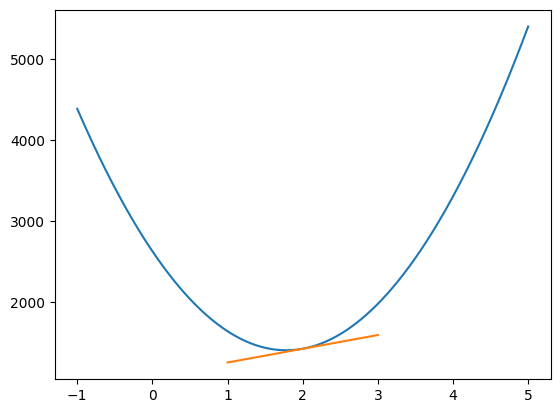

In [10]:
ff = lambda a: grad_rss(a,X,Y)
fff = lambda a: (a-a0)*ff(a0)+f(a0)
a_range = np.linspace(a0-3, a0+3, 500)
plot_rss(f, a_range)
#plot_rss(ff, a_range)
a_range = np.linspace(a0-1, a0+1, 500)
plot_rss(fff, a_range)

We iteratively approximate $\hat a$ with gradient descent, i.e., starting with an initial guess $a_0$ and a learning rate of $\varepsilon$ we iterate over

$$
\begin{aligned}
a_{k+1} &= a_k - \varepsilon \nabla RSS(a_k) \\
&= a_k + 2 \varepsilon \sum_{i=1}^{n}(y_i- a_k x_i)x_i
\end{aligned}
$$

In [11]:
def grad_desc_rss(K, a0, learning_eps, f, ff, verbose):
    a_list = np.zeros((K+1))
    a_list[0] = a0
    for k in range(K):
        a_list[k+1] = a_list[k] - learning_eps * ff(a_list[k])
        if verbose:
            plt.plot(a_list[k:k+2], f(a_list[k:k+2]), linestyle=':')
            plt.plot(a_list[k+1], f(a_list[k+1]))
    
    if verbose:
        space = np.linspace(np.min(a_list), np.max(a_list), 1000)
        plot_rss(f,space)
        fff = lambda a: (a-a0)*ff(a0)+f(a0)
        space = np.linspace(a0-1, a0+1, 1000)
        plot_rss(fff,space)

        fff = lambda a: (a-a_list[k+1])*ff(a_list[k+1])+f(a_list[k+1])
        space = np.linspace(a_list[k+1]-1, a_list[k+1]+1, 1000)
        plot_rss(fff,space)
    return a_list

as = [2.         1.83087848 1.79198053 1.783034   1.7809763  1.78050303
 1.78039418 1.78036914 1.78036338 1.78036206 1.78036175]


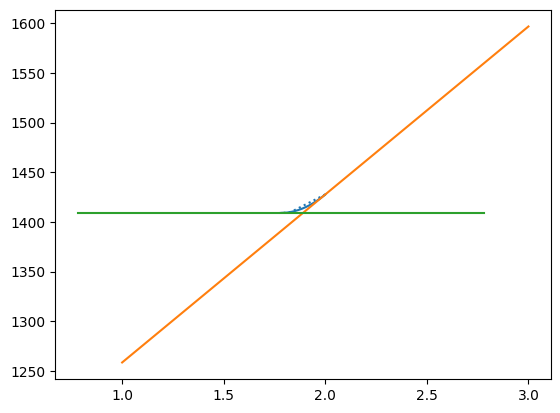

In [12]:
K = 10
learning_eps = 0.001
a_list = grad_desc_rss(K, a0, learning_eps, f, ff, True)
print(f'as = {a_list}') 


as = [2.         1.98308785 1.96747793 1.95306998 1.93977144 1.92749689
 1.91616747 1.90571043 1.89605857 1.88714991 1.87892721]


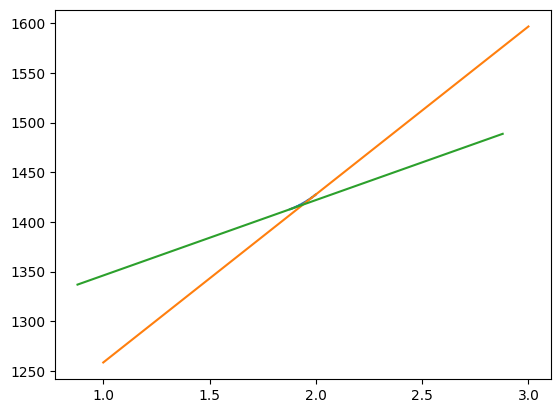

In [13]:
learning_eps = 0.0001
print(f'as = {grad_desc_rss(K, a0, learning_eps, f, ff, True)}') 


as = [ 2.          1.49263544  2.15728301  1.28659469  2.42719639  0.93300817
  2.89039474  0.32621833  3.68528943 -0.71509372  5.04940821]


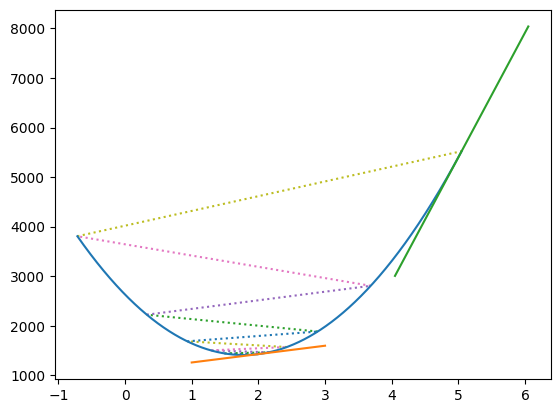

In [14]:
learning_eps = 0.003
print(f'as = {grad_desc_rss(K, a0, learning_eps, f, ff, True)}') 


*Try different learning rates and interpret the effect. Your answer goes here!*

Here the final result.

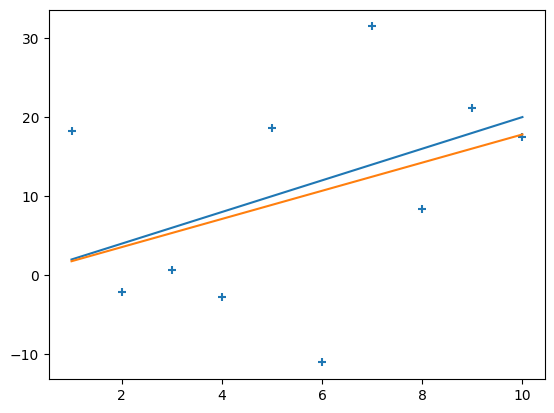

In [15]:
plt.scatter(X,Y,marker='+')
plt.plot(X, a0*X)
plt.plot(X, a_list[-1]*X)
plt.show()

## Newton method with one variable

It is obviously difficult to set the learning rate right. To help this, the Newton method adjusts the learning rate $\varepsilon$ in each step to $1/h(a_i)$, i.e., the inverse of the second derivative $h(a)$ of the loss function at the current location $a_i$. In our case it is the inverse of the second derivative of $RSS$.

$$
\begin{aligned}
h(a) &= \frac{\partial^2 RSS(a)}{\partial a^2}\\
&=\frac{\partial (-2 \sum_{i=1}^{n}(y_i- a x_i)x_i)}{\partial a}\\
&=2\sum_{i=1}^{n}x_i^2\\
\end{aligned}
$$

We observe, that $h$ is a constant w.r.t. $a$ and, hence, it does not change during iteration in our quadratic optimization case.

In [16]:
h = 2 * sum(X**2)
learning_eps = 1/h
print(f'learning_eps = {learning_eps}' )

learning_eps = 0.0012987012987012987


array([2.        , 1.78036166])

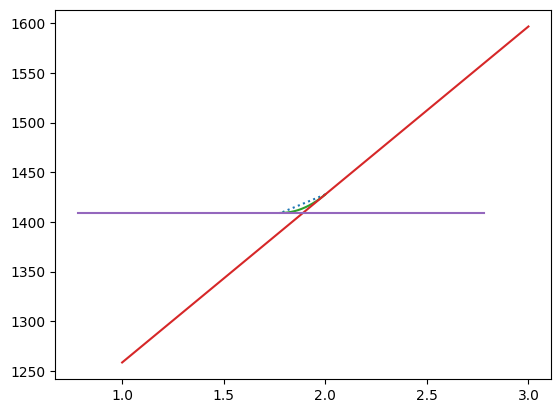

In [17]:
grad_desc_rss(1, a0, learning_eps, f, ff, True)

## Gradient descent with two (and more) variables

Let us add an intercept to the linear model $Y = aX +b$ still with one feature $X$ and one response $Y$, but with slope $a$ and intercept $b$ to be learned.

We generate data for $Y=2X - 3$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

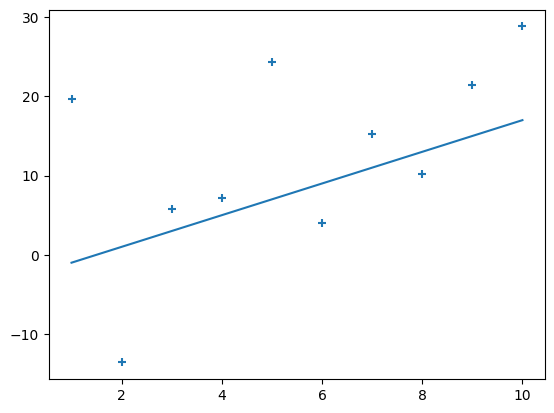

In [18]:
b0 = -3
Y = a0*X-b0 + np.random.normal(0.0,10.0,N)
plt.scatter(X,Y, marker='+')
plt.plot(X, a0*X+b0)
plt.show()

We learn $\hat a$ and $\hat b$ from the data and expect them to be $\approx 2$ and $\approx -3$, respectively. 
Therefore, we minimize the residual sum of squares $RSS=\sum_{i=1}^{n}(y_i-\hat a x_i - \hat b)^2$.  

Let's define and 3D-plot the modified $RSS$ as a function of $a$ and $b$. We chose the ranges of $a$ and $b$ around the (actually unknown) expected minima of $\approx 2$ and $\approx -3$, respectively. 

In [19]:
def rss2(a,b,X,Y):
    n = len(X)
    rss = 0
    for i in range(n):
        rss += (Y[i]-a*X[i]-b)**2
    return rss

In [31]:
def plot3d(f,A,B,real3d):
    Z = f(A,B)
    if real3d:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(A, B, Z, cmap='viridis')
        fig.colorbar(surf, shrink=0.5, aspect=5)
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        surf = ax.contour(A, B, Z, cmap='viridis')
        fig.colorbar(surf, shrink=0.5, aspect=5)
    return fig, ax
    

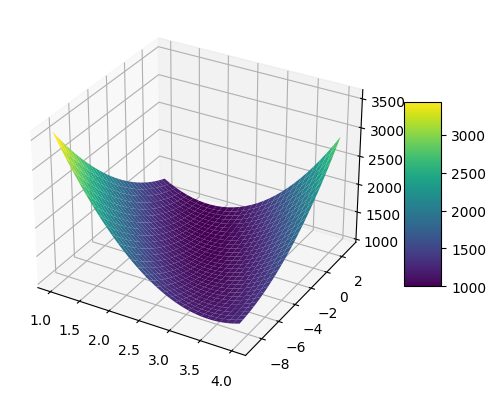

In [21]:
f = lambda a,b: rss2(a,b,X,Y)


a_sequence = np.linspace(a0-1, a0+2, 30)
b_sequence = np.linspace(b0-6, b0+6, 30)

A, B = np.meshgrid(a_sequence, b_sequence)

plot3d(f, A,B, True)
plt.show()

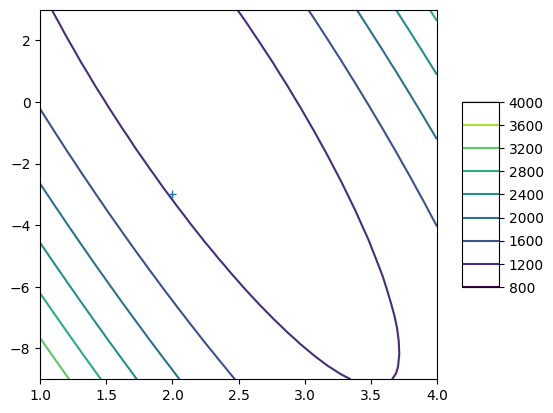

In [22]:
plot3d(f,A,B,False)
plt.plot(a0, b0, marker='+')
plt.show()

*What can you say about the loss function space? Your answer goes here.* 

The gradient of $RSS(a,b)$ for any $a, b$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a,b) &= \left [ \frac{\partial RSS(a,b)}{\partial a}, \frac{\partial RSS(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial a}, 
           \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial b}\right ]^T \\
&= \left [ \sum_{i=1}^{n}2(y_i- a x_i-b)(-x_i),\sum_{i=1}^{n}2(y_i- a x_i-b)(-1) \right ]^T \\
&= \left [ -2\sum_{i=1}^{n}(y_i- a x_i-b)x_i,-2\sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T \\
&= -2 \left [ \sum_{i=1}^{n}(y_i- a x_i-b)x_i, \sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T 
\end{aligned}
$$

In [29]:
def grad_rss2(a,b,X,Y):
    n = len(X)
    grad_a = 0
    grad_b = 0
    for i in range(n):
        temp = (Y[i]-a*X[i]-b)
        grad_a += temp*X[i]
        grad_b += temp

    return np.array([-2 * grad_a, -2 * grad_b])

In [68]:
def grad_desc_rss2(K, a0, b0, learning_eps, f, ff, verbose):
    a_list = np.zeros((K+1))
    b_list = np.zeros((K+1))
    a_list[0] = a0
    b_list[0] = b0
    for k in range(K):
        grad_w = ff(a_list[k], b_list[k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]

        a_list[k+1] = a_list[k] - learning_eps * grad_a
        b_list[k+1] = b_list[k] - learning_eps * grad_b 

    if verbose:
        alow = min(a0-2, np.min(a_list))
        ahigh = max(a0+2, np.max(a_list))
        blow = min(b0-5, np.min(b_list))
        bhigh = max(b0+5, np.max(b_list))
        a_sequence = np.linspace(alow, ahigh, 30)
        b_sequence = np.linspace(blow, bhigh, 30)

        A, B = np.meshgrid(a_sequence, b_sequence)
        fig, ax = plot3d(f, A, B, False)
        for k in range(K):
            ax.plot([a_list[k], a_list[k+1]], [b_list[k], b_list[k+1]])

    return a_list, b_list

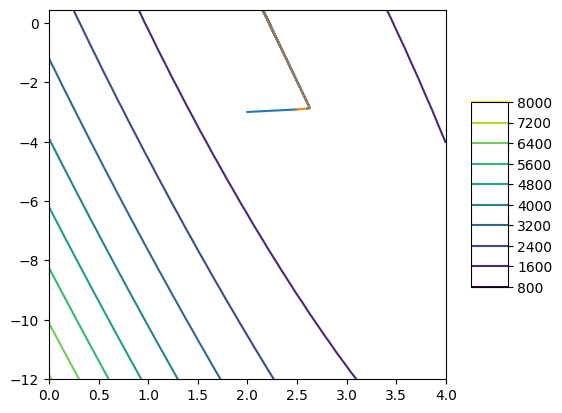

In [43]:
ff = lambda a,b: grad_rss2(a,b,X,Y)
K = 1000
learning_eps = 0.001
a_fitted, b_fitted = grad_desc_rss2(K, a0, b0, learning_eps, f, ff, True)


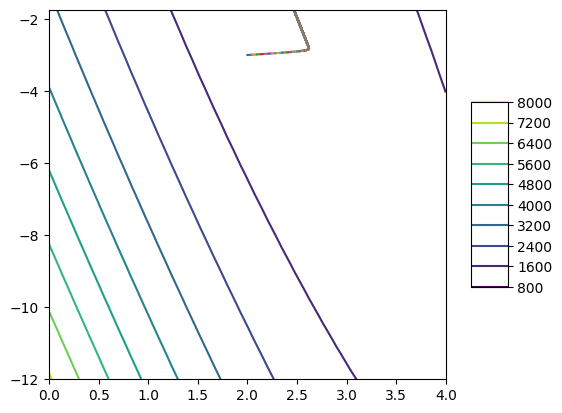

In [34]:
learning_eps = 0.0001
grad_desc_rss2(K, a0, b0, learning_eps, f, ff, True)

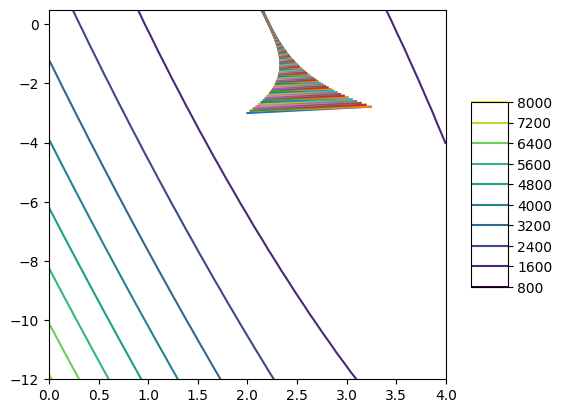

In [41]:
learning_eps = 0.0025
grad_desc_rss2(K, a0, b0, learning_eps, f, ff, True)

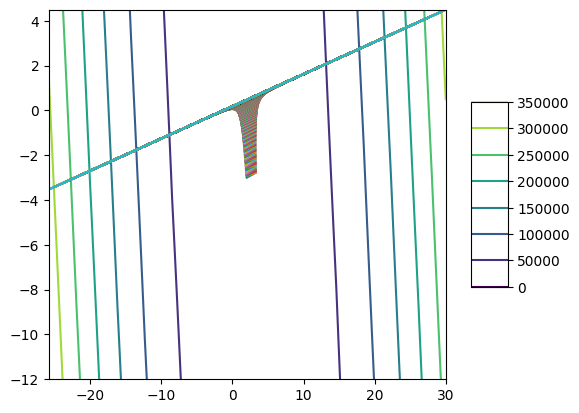

In [42]:
learning_eps = 0.00255
grad_desc_rss2(K, a0, b0, learning_eps, f, ff, True)

*Try different learning rates and interpret the effect. Your answer goes here!*

Here the final result.

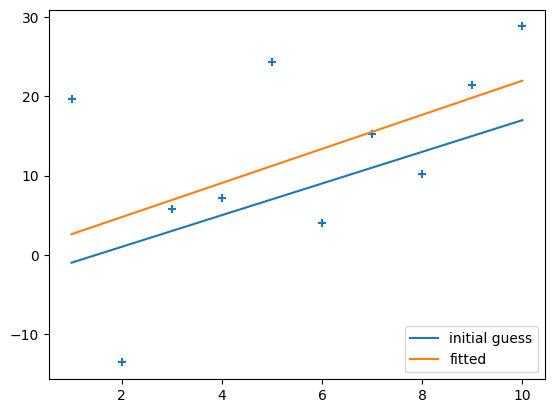

In [49]:
plt.scatter(X,Y, marker='+')
plt.plot(X, a0*X+b0, label='initial guess')
plt.plot(X, a_fitted[-1]*X+b_fitted[-1], label='fitted')
plt.legend(loc='lower right')
plt.show()


## Newton method with two (and more) variables

It is still difficult to set the learning rate right. To help this, the Newton method for one variable generalizes:

$$
[a_{k+1}, b_{k+1}] = [a_k,b_k] - H_{RSS}(a_k,b_k)^{-1} \nabla RSS(a_k,b_k) 
$$

where $H_{RSS}$ is the Hessian matrix of $RSS$. 

The Hessian matrix is defined as:
$$
\begin{aligned}
H_{RSS}(a,b) &= 
\begin{bmatrix}
\frac{\partial^2 RSS(a,b)}{\partial a^2} & \frac{\partial^2 RSS(a,b)}{\partial a \partial b} \\
\frac{\partial^2 RSS(a,b)}{\partial b \partial a} & \frac{\partial^2 RSS(a,b)}{\partial b^2} 
\end{bmatrix}\\
&=
\begin{bmatrix}
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial b} \\
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)) }{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b))}{\partial b} 
\end{bmatrix}\\
&=
\begin{bmatrix}
2\sum_{i=1}^{n}x_i^2 & 2\sum_{i=1}^{n}x_i \\
2\sum_{i=1}^{n}x_i & 2n
\end{bmatrix}\\
&=2
\begin{bmatrix}
\sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i \\
\sum_{i=1}^{n}x_i & n
\end{bmatrix}\\
\end{aligned}
$$

As in the case for one variable, we observe that $H_{RSS}$ is a constant matrix, i.e., it does not change during the iterations in our quadratic optimization case.

In [53]:
H = np.zeros((2,2))
H[0,0] = 2*sum(X**2)
H[0,1] = 2*sum(X)
H[1,0] = H[0,1]
H[1,1] = 2*len(X)
H_inv = np.linalg.inv(H)
print(f'H = {H}')
print(f'H_inv = {H_inv}')

H = [[770. 110.]
 [110.  20.]]
H_inv = [[ 0.00606061 -0.03333333]
 [-0.03333333  0.23333333]]


Recall the inverse of a $2\times 2$ matrix $H$: 

$$
\begin{aligned}
H^{-1} &=\frac{1}{h_{11}h_{22}-h_{12}h_{21}}
\begin{bmatrix}
h_{22} & -h_{12} \\
-h_{21} & h_{11} 
\end{bmatrix}\\
\end{aligned}
$$

A learning rate $\varepsilon$ only scales the gradient vector; a Hessian matrix scales and rotates the gradient vector. Check how this concrete Hessian matrix transforms (scales and rotates) a unit vector:

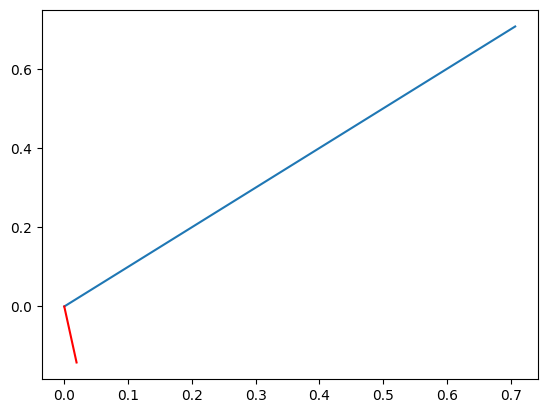

In [60]:
import math 

v = np.array([1/math.sqrt(2), 1/math.sqrt(2)])
plt.plot([0,v[0]], [0,v[1]])
v2 = np.dot(-H_inv, np.transpose(v))
plt.plot([0,v2[0]], [0,v2[1]], c='r')
plt.show()

In [66]:
def newton_rss2(K, a0, b0, H, f, ff, verbose):
    H_inv = np.linalg.inv(H)
    ab = np.zeros((2,K+1))
    ab[0,0] = a0
    ab[1,0] = b0
    for k in range(K):
        grad_w = ff(ab[0,k], ab[1,k])
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        ab[:,k+1] = ab[:,k] - np.dot(H_inv, np.transpose(np.array([grad_a, grad_b])))

    if verbose:
        alow = min(a0-2, np.min(ab[0,:]))
        ahigh = max(a0+2, np.max(ab[0,:]))
        blow = min(b0-5, np.min(ab[1,:]))
        bhigh = max(b0+5, np.max(ab[1,:]))
        a_sequence = np.linspace(alow, ahigh, 30)
        b_sequence = np.linspace(blow, bhigh, 30)

        A, B = np.meshgrid(a_sequence, b_sequence)
        fig, ax = plot3d(f, A, B, False)
        for k in range(K):
            ax.plot([ab[0,k], ab[0,k+1]], [ab[1,k], ab[1,k+1]])

    return ab

ab_newton = [[ 2.          2.14708232  2.14708232]
 [-3.          0.4951634   0.4951634 ]]


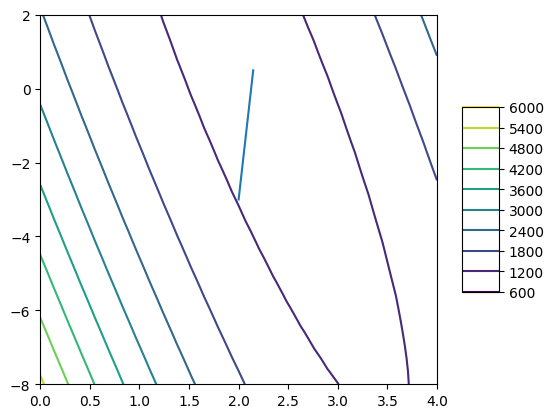

In [67]:
K = 2
ab_newton = newton_rss2(K, a0, b0, H, f, ff, True)
print(f'ab_newton = {ab_newton}')

In [69]:
rss_0 = f(a0, b0)
rss_opt = f(ab_newton[0,-1], ab_newton[1,-1])

print(f'rss_0 = {rss_0}')
print(f'rss_opt = {rss_opt}')

rss_0 = 1183.5345788610894
rss_opt = 996.4956782237203


The Newton method could overshoot the minimum (if the loss function is not convex or due to numerical errors). Therefore, the relaxed or damped Newton's method introduces a damping factor $0<\gamma \leq 1$. Also, we exit when we overshoot the optimum.

In [ ]:
%%file damped_newton_rss2.m
function res = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, verbose)
    H_inv = gamma*inv(H);
    ab = zeros(2,K+1);
    ab(1,1)=a0;
    ab(2,1)=b0;
    for k = 1:K
        grad_w = ff(ab(1,k),ab(2,k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        %H_inv * [grad_a, grad_b].'
        ab(:,k+1)= ab(:,k) - H_inv * [grad_a, grad_b].';
        if f(ab(1,k+1),ab(2,k+1)) >= f(ab(1,k),ab(2,k)) 
            k=k-1;
            break
        end
        if verbose
            line([ab(1,k),ab(1,k+1)],[ab(2,k),ab(2,k+1)])
            hold on
        end
    end
    res = ab(:,1:k+1);
    if verbose
        alow = min([ab(1,:), a0-2]);
        ahigh = max([ab(1,:), a0+2]);
        blow = min([ab(2,:), b0-9]);
        bhigh = max([ab(2,:), b0+0]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/damped_newton_rss2.m'.



ab_newton =

  Columns 1 through 7

    2.0000    2.1311    2.2491    2.3554    2.4509    2.5370    2.6144
   -3.0000   -3.8004   -4.5208   -5.1691   -5.7526   -6.2778   -6.7504

  Columns 8 through 14

    2.6841    2.7468    2.8033    2.8541    2.8998    2.9409    2.9780
   -7.1758   -7.5586   -7.9032   -8.2133   -8.4924   -8.7435   -8.9696

  Columns 15 through 21

    3.0113    3.0413    3.0683    3.0926    3.1144    3.1341    3.1518
   -9.1731   -9.3562   -9.5210   -9.6693   -9.8028   -9.9229  -10.0310

  Columns 22 through 28

    3.1678    3.1821    3.1950    3.2067    3.2171    3.2265    3.2350
  -10.1283  -10.2159  -10.2948  -10.3657  -10.4295  -10.4870  -10.5387

  Columns 29 through 35

    3.2426    3.2495    3.2557    3.2612    3.2662    3.2707    3.2748
  -10.5853  -10.6271  -10.6648  -10.6988  -10.7293  -10.7568  -10.7815

  Columns 36 through 42

    3.2784    3.2817    3.2847    3.2873    3.2897    3.2919    3.2938
  -10.8038  -10.8238  -10.8419  -10.8581  -10.8727  -

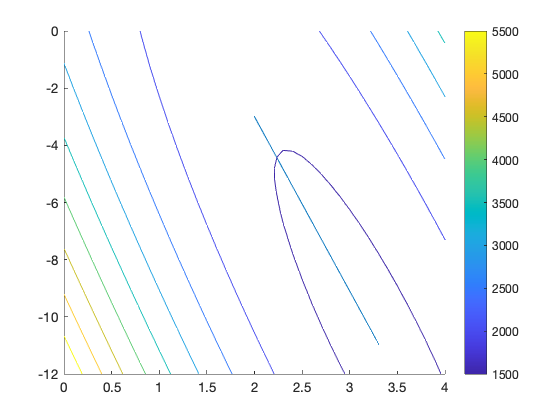

In [ ]:
K=1000;
gamma=0.1;
%gamma=0.9;
ab_newton = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, true)

In [ ]:
rss_0 = f(a0,b0)
rss_opt = f(ab_newton(1,size(ab_newton,2)),ab_newton(2,size(ab_newton,2)))


rss_0 =

   1.5473e+03


rss_opt =

   1.3992e+03




*Try different damping factors and interpret the effect. Your answer goes here!*

Here the final result.

In [ ]:
ab_newton(1,size(ab_newton,2)),ab_newton(2,size(ab_newton,2))


ans =

    3.3113


ans =

  -11.0042


